In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re
import warnings
warnings.filterwarnings('ignore')

In [2]:
import sys
sys.path.append("../scripts/")
from data_cleaner import DataCleaner
from util import Util

In [4]:
util = Util()
cleaner = DataCleaner()

In [5]:
repo="https://github.com/Nathnael12/prompt-engineering.git"
news_df=util.read_from_dvc("data/news.csv",repo,"news-v0",low_memory=False)

# news_df=util.read_from_file('../data/news.csv')

In [6]:
print(news_df.shape)
news_df.head()

(10, 9)


,Domain,Title,Description,Body,Link,timestamp,Analyst_Average_Score,Analyst_Rank,Reference_Final_Score
0,rassegnastampa.news,Boris Johnson using a taxpayer-funded jet for ...,…often trigger a protest vote that can upset…t...,Boris Johnson using a taxpayer-funded jet for ...,https://rassegnastampa.news/boris-johnson-usin...,2021-09-09T18:17:46.258006,0.0,4,1.96
1,twitter.com,"Stumbled across an interesting case, a woman f...","Stumbled across an interesting case, a woman f...","Stumbled across an interesting case, a woman f...",http://twitter.com/CoruscaKhaya/status/1435585...,2021-09-08T13:02:45.802298,0.0,4,12.00
2,atpe-tchad.info,Marché Résines dans les peintures et revêtemen...,…COVID-19…COVID…COVID…COVID-19 et Post COVID…C...,Le rapport d’étude de marché Résines dans les ...,http://atpe-tchad.info/2021/09/13/marche-resin...,2021-09-13T07:32:46.244403,0.0,4,0.05
3,badbluetech.bitnamiapp.com,"AI drives data analytics surge, study finds",…hate raiders' linked to automated harassment ...,How to drive the funnel through content market...,http://badbluetech.bitnamiapp.com/p.php?sid=21...,2021-09-11T00:17:45.962605,0.0,4,6.10
4,kryptogazette.com,Triacetin Vertrieb Markt 2021: Globale Unterne...,…Abschnitten und Endanwendungen / Organisation...,Global Triacetin Vertrieb-Markt 2021 von Herst...,https://kryptogazette.com/2021/09/08/triacetin...,2021-09-08T12:47:46.078369,0.0,4,0.13


In [7]:
news_df.columns

Index(['Domain', 'Title', 'Description', 'Body', 'Link', 'timestamp',
       'Analyst_Average_Score', 'Analyst_Rank', 'Reference_Final_Score'],
      dtype='object')

In [8]:
news_df.describe()

,Analyst_Average_Score,Analyst_Rank,Reference_Final_Score
count,10.000000,10.000000,10.000000
mean,0.332000,3.400000,4.532000
std,0.626379,1.074968,4.834468
min,0.000000,1.000000,0.050000
25%,0.000000,3.250000,0.505000
50%,0.000000,4.000000,2.180000
75%,0.247500,4.000000,9.100000
max,1.660000,4.000000,12.000000


we have three numerical columns here, according to the given task, we are required to give score in the range of 0 - 10 so we will use analyst_average score for training 

In [9]:
# make a little rearrange of columns

temp = news_df['Analyst_Average_Score']
news_df.drop('Analyst_Average_Score',axis=1,inplace=True)
news_df['Analyst_Average_Score']=temp
news_df.head()

,Domain,Title,Description,Body,Link,timestamp,Analyst_Rank,Reference_Final_Score,Analyst_Average_Score
0,rassegnastampa.news,Boris Johnson using a taxpayer-funded jet for ...,…often trigger a protest vote that can upset…t...,Boris Johnson using a taxpayer-funded jet for ...,https://rassegnastampa.news/boris-johnson-usin...,2021-09-09T18:17:46.258006,4,1.96,0.0
1,twitter.com,"Stumbled across an interesting case, a woman f...","Stumbled across an interesting case, a woman f...","Stumbled across an interesting case, a woman f...",http://twitter.com/CoruscaKhaya/status/1435585...,2021-09-08T13:02:45.802298,4,12.00,0.0
2,atpe-tchad.info,Marché Résines dans les peintures et revêtemen...,…COVID-19…COVID…COVID…COVID-19 et Post COVID…C...,Le rapport d’étude de marché Résines dans les ...,http://atpe-tchad.info/2021/09/13/marche-resin...,2021-09-13T07:32:46.244403,4,0.05,0.0
3,badbluetech.bitnamiapp.com,"AI drives data analytics surge, study finds",…hate raiders' linked to automated harassment ...,How to drive the funnel through content market...,http://badbluetech.bitnamiapp.com/p.php?sid=21...,2021-09-11T00:17:45.962605,4,6.10,0.0
4,kryptogazette.com,Triacetin Vertrieb Markt 2021: Globale Unterne...,…Abschnitten und Endanwendungen / Organisation...,Global Triacetin Vertrieb-Markt 2021 von Herst...,https://kryptogazette.com/2021/09/08/triacetin...,2021-09-08T12:47:46.078369,4,0.13,0.0


<AxesSubplot:>

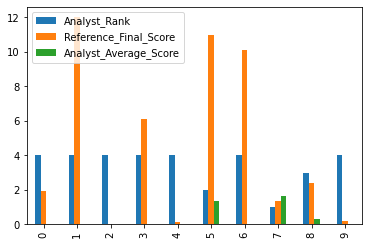

In [10]:
news_df.plot(kind='bar')

In [12]:
cleaned_df=cleaner.clean_links(news_df,['Body'])
cleaned_df=cleaner.clean_symbols(cleaned_df,['Body','Description','Title'])
cleaned_df=cleaner.convert_to_datetime(cleaned_df,['timestamp'])
cleaned_df.head(5)

,Domain,Title,Description,Body,Link,timestamp,Analyst_Rank,Reference_Final_Score,Analyst_Average_Score
0,rassegnastampa.news,Boris Johnson using a taxpayer funded jet for ...,often trigger a protest vote that can upset t...,Boris Johnson using a taxpayer funded jet for ...,https://rassegnastampa.news/boris-johnson-usin...,2021-09-09 18:17:46.258006,4,1.96,0.0
1,twitter.com,Stumbled across an interesting case a woman f...,Stumbled across an interesting case a woman f...,Stumbled across an interesting case a woman f...,http://twitter.com/CoruscaKhaya/status/1435585...,2021-09-08 13:02:45.802298,4,12.00,0.0
2,atpe-tchad.info,Marché Résines dans les peintures et revêtemen...,COVID 19 COVID COVID COVID 19 et Post COVID C...,Le rapport d étude de marché Résines dans les ...,http://atpe-tchad.info/2021/09/13/marche-resin...,2021-09-13 07:32:46.244403,4,0.05,0.0
3,badbluetech.bitnamiapp.com,AI drives data analytics surge study finds,hate raiders linked to automated harassment ...,How to drive the funnel through content market...,http://badbluetech.bitnamiapp.com/p.php?sid=21...,2021-09-11 00:17:45.962605,4,6.10,0.0
4,kryptogazette.com,Triacetin Vertrieb Markt 2021 Globale Unterne...,Abschnitten und Endanwendungen Organisation...,Global Triacetin Vertrieb Markt 2021 von Herst...,https://kryptogazette.com/2021/09/08/triacetin...,2021-09-08 12:47:46.078369,4,0.13,0.0


In [13]:
# uncomment this for first run only
# cleaned_df.to_csv('../data/news.csv',index=False)

### our first try structure for co:here API

Task: Score news relevance

Domain: {Domain}

Title: {Title}

Description: {
    long text Description
}

Body: {
    long text Body
}

Analyst_Average_Score : {Analyst_Average_Score}

In [13]:
cleaned_df=cleaner.clean_stopwords(cleaned_df,['Body','Title','Description'])
cleaned_df.head(10)

,Domain,Title,Description,Body,Link,timestamp,Analyst_Rank,Reference_Final_Score,Analyst_Average_Score
0,rassegnastampa.news,Boris Johnson taxpayer funded jet election cam...,trigger protest vote upset ministers breach Mi...,Boris Johnson taxpayer funded jet election cam...,https://rassegnastampa.news/boris-johnson-usin...,2021-09-09 18:17:46.258006,4,1.96,0.00
1,twitter.com,Stumbled interesting case woman facing evictio...,Stumbled interesting case woman facing evictio...,Stumbled interesting case woman facing evictio...,http://twitter.com/CoruscaKhaya/status/1435585...,2021-09-08 13:02:45.802298,4,12.00,0.00
2,atpe-tchad.info,Marché Résines dans les peintures et revêtemen...,COVID 19 COVID COVID COVID 19 et Post COVID CO...,Le rapport d étude marché Résines dans les pei...,http://atpe-tchad.info/2021/09/13/marche-resin...,2021-09-13 07:32:46.244403,4,0.05,0.00
3,badbluetech.bitnamiapp.com,AI drives data analytics surge study finds,hate raiders linked automated harassment campa...,How drive funnel content marketing link buildi...,http://badbluetech.bitnamiapp.com/p.php?sid=21...,2021-09-11 00:17:45.962605,4,6.10,0.00
4,kryptogazette.com,Triacetin Vertrieb Markt 2021 Globale Unterneh...,Abschnitten und Endanwendungen Organisationen ...,Global Triacetin Vertrieb Markt 2021 von Herst...,https://kryptogazette.com/2021/09/08/triacetin...,2021-09-08 12:47:46.078369,4,0.13,0.00
5,mype.co.za,Male arrested murder elderly female Cofimvaba ...,Crime Stamp Out N1 R101 roads appear court SAP...,South African Police Service Office Provincial...,https://mype.co.za/new/male-arrested-for-the-m...,2021-09-10 00:17:46.055622,2,11.00,1.33
6,eminetra.co.za,7th Anniversary SCOAN Collapse Nigeria SABC News,Lagos Nigeria 84 South Africans killed The bui...,Today 7th anniversary Tragic collapse At synag...,https://eminetra.co.za/7th-anniversary-of-scoa...,2021-09-12 05:17:50.279081,4,10.10,0.00
7,eminetra.co.za,The construction sector expected boosted riots...,additional spending buildings repairs security...,Construction activity grew steadily 4 second q...,https://eminetra.co.za/the-construction-sector...,2021-09-09 09:02:46.320793,1,1.36,1.66
8,news24.com,News24 com Court dismisses attempt Eskom CEO p...,Lawsuit Against Public Participation designed ...,Former Eskom CEO Matshela Moses Koko sought R5...,https://www.news24.com/news24/southafrica/news...,2021-09-09 19:32:46.239682,3,2.40,0.33
9,manometcurrent.com,Global Regional Beta Carotene Market Research ...,key players DSM BASF Allied Biotech Chr histor...,Global Regional Beta Carotene Market Research ...,https://manometcurrent.com/global-and-regional...,2021-09-13 03:02:45.609228,4,0.22,0.00


In [68]:
import cohere
def predict(train_df:pd.DataFrame,test:pd.DataFrame):

    test_df=test.drop(train_df.columns[len(train_df.columns)-1],axis=1)

    prompt=""
    for ind in train_df.index:
        for col in train_df.columns:
            prompt += f"{col}: {train_df.loc[ind,col]}\n\n"
        prompt += "-- --\n\n"

    for col in test_df.columns:
        ind=test_df.index[0]
        prompt += f"{col}: {test_df.loc[ind,col]}\n\n"

    prompt += f"{train_df.columns[len(train_df.columns)-1]}: "
    prompt = "Task: Score News relevance\n\n"+prompt
    
    
    co = cohere.Client(f'{api_key}')
    response = co.generate(
    model='xlarge',
    prompt=prompt,
    max_tokens=4,
    temperature=0.9,
    k=0,
    p=0.75,
    frequency_penalty=0,
    presence_penalty=0,
    stop_sequences=["-- --"],
    return_likelihoods='NONE')
    print('Prediction: {}'.format(response.generations[0].text))
    display(test)

    print("Trained By")
    display(train_df)

    # print(prompt)

In [70]:
cleaned_df.columns

Index(['Domain', 'Title', 'Description', 'Body', 'Link', 'timestamp',
       'Analyst_Rank', 'Reference_Final_Score', 'Analyst_Average_Score'],
      dtype='object')

In [73]:
all_columns=['Domain', 'Title', 'Description', 'Body', 'Link', 'timestamp','Analyst_Rank', 'Reference_Final_Score', 'Analyst_Average_Score']
useful_columns=['Domain', 'Title', 'Description', 'Body','Analyst_Rank','Analyst_Average_Score']
drop_columns=['Link','Reference_Final_Score','timestamp']

all_train=cleaned_df.head(9)[useful_columns]
unique_train=all_train.drop_duplicates(subset=["Analyst_Average_Score"], keep='first')
unique_train=unique_train.sample(2)
test=cleaned_df.tail(1).drop(drop_columns,axis=1)
predict(unique_train,test)




Prediction:  0.4



,Domain,Title,Description,Body,Analyst_Rank,Analyst_Average_Score
9,manometcurrent.com,Global Regional Beta Carotene Market Research ...,key players DSM BASF Allied Biotech Chr histor...,Global Regional Beta Carotene Market Research ...,4,0.0


Trained By


,Domain,Title,Description,Body,Analyst_Rank,Analyst_Average_Score
7,eminetra.co.za,The construction sector expected boosted riots...,additional spending buildings repairs security...,Construction activity grew steadily 4 second q...,1,1.66
8,news24.com,News24 com Court dismisses attempt Eskom CEO p...,Lawsuit Against Public Participation designed ...,Former Eskom CEO Matshela Moses Koko sought R5...,3,0.33
